In [5]:
from sklearn.datasets import load_iris, make_regression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import random
import os

saved_cropped_images = '//nmbu.no/Research/Project/CubiAI/preprocess/cropped/'
os.chdir(saved_cropped_images)

In [37]:
df = pd.DataFrame(columns=['shape','ax0','ax1'])
for folder in os.listdir():
    # Check whether file is in text format or not
    if not folder.endswith("old"):
        path = f"{saved_cropped_images}{folder}/"
        os.chdir(path)
        print(path)

        for file in os.listdir():
            filename = f"{path}{file}"
            img = np.load(filename)
            df.loc[len(df)]=[img.shape,img.shape[0],img.shape[1]]
        os.chdir(saved_cropped_images)
        

//nmbu.no/Research/Project/CubiAI/preprocess/cropped/0/
//nmbu.no/Research/Project/CubiAI/preprocess/cropped/1, artrose og-eller sklerose/
//nmbu.no/Research/Project/CubiAI/preprocess/cropped/2, artrose/
//nmbu.no/Research/Project/CubiAI/preprocess/cropped/2, mistanke MCD/
//nmbu.no/Research/Project/CubiAI/preprocess/cropped/3, artrose/
//nmbu.no/Research/Project/CubiAI/preprocess/cropped/3, MCD/
//nmbu.no/Research/Project/CubiAI/preprocess/cropped/3, OCD/
//nmbu.no/Research/Project/CubiAI/preprocess/cropped/3, UAP/


mean:  826.1538238702202 median:  785.0


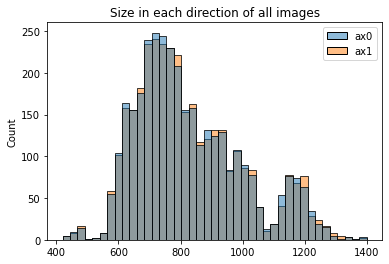

In [48]:
ds = df.copy()
ds = ds[ds.ax0>100]
sns.histplot(data=ds)
plt.title('Size in each direction of all images')

print('mean: ',np.mean(ds.ax0),
'median: ',np.median(ds.ax0))